In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from scipy import interp
import seaborn as sns
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold, GridSearchCV,train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
root='/content/drive/My Drive/data.csv'
df=pd.read_csv(root)

In [ ]:
lb = LabelBinarizer()
df['diagnosis'] = lb.fit_transform(df['diagnosis'].values)
y=df['diagnosis']
targets=df['diagnosis']
df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
x=df
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.1,random_state=4)
feature_names = x.columns.tolist()
clf=DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10,shuffle=False)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=clf.predict(x_test)

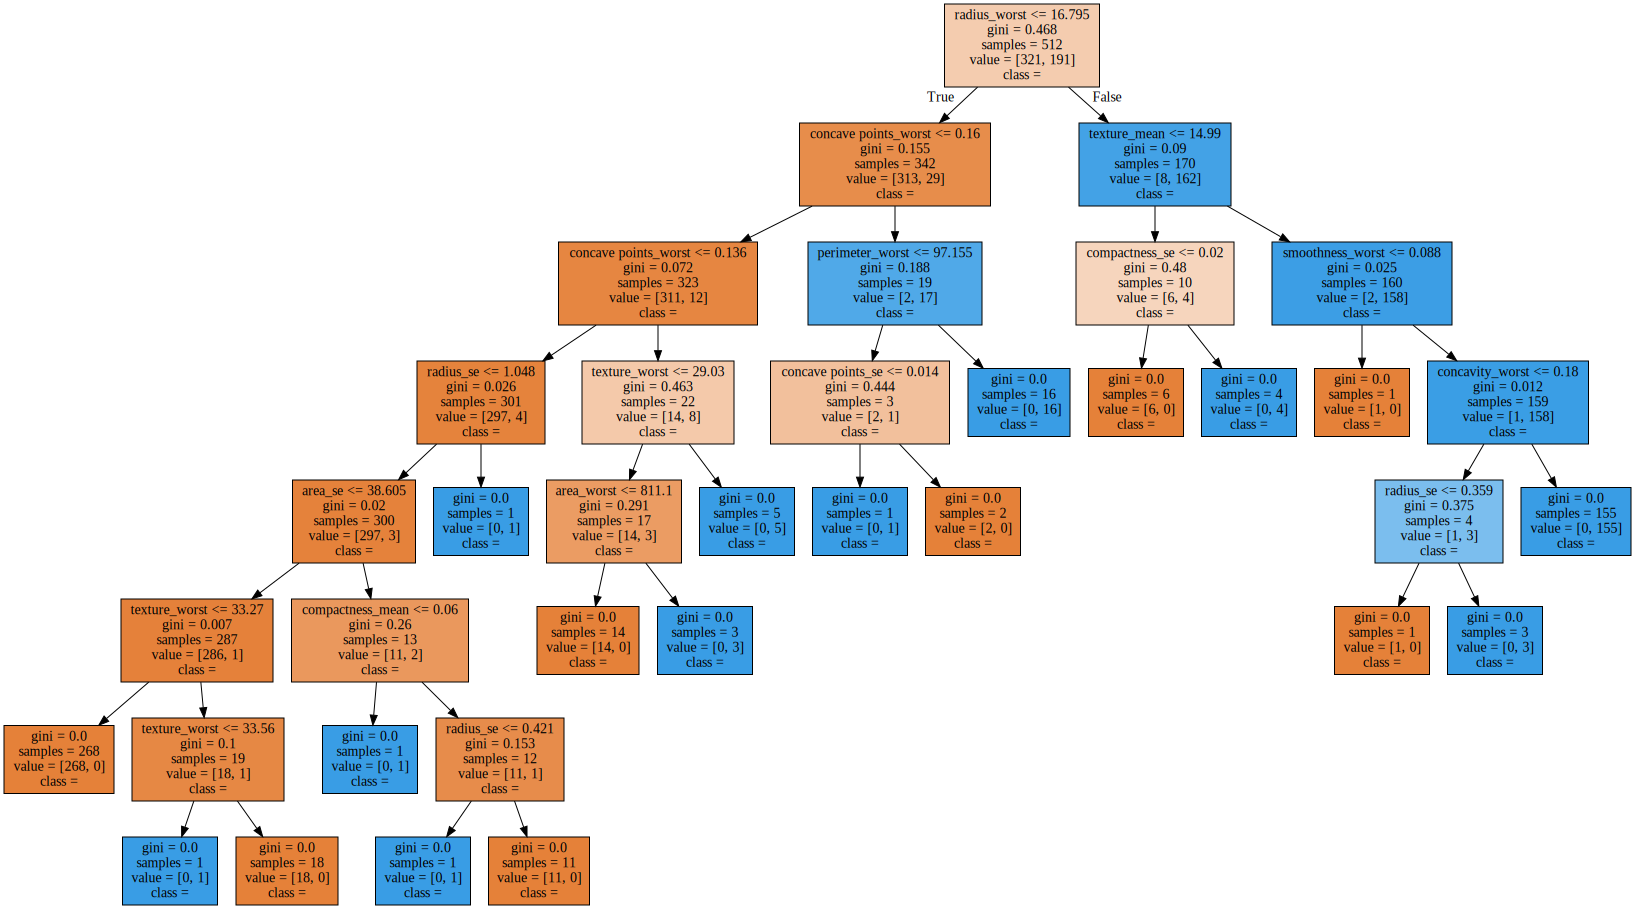

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=[ "양성","악성"],
                feature_names=feature_names,
                impurity=True, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print("특성 중요도 : \n{}".format(clf.feature_importances_))
feature_imp=clf.feature_importances_
data = pd.DataFrame(data=feature_imp,index=x_train.columns, columns=["score"]).sort_values(by = "score", ascending=False)
print(data[:8])

특성 중요도 : 
[0.         0.02712804 0.         0.         0.         0.00647727
 0.         0.         0.         0.         0.0220756  0.
 0.         0.00234807 0.         0.02004208 0.         0.00556724
 0.         0.         0.7146971  0.03020372 0.00937641 0.02063155
 0.00819462 0.         0.0020352  0.13122309 0.         0.        ]
                         score
radius_worst          0.714697
concave points_worst  0.131223
texture_worst         0.030204
texture_mean          0.027128
radius_se             0.022076
area_worst            0.020632
compactness_se        0.020042
perimeter_worst       0.009376


In [ ]:
c_mat=confusion_matrix(y_test,y_pred)
print(c_mat)

[[33  3]
 [ 3 18]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.86      0.86      0.86        21

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



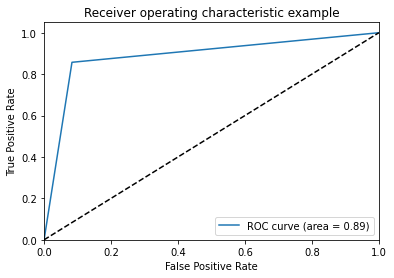

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy_score(y_test,clf.predict(x_test))

0.8947368421052632

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf, df, targets, cv=cv)
print(cvs)
mean_acc=np.mean(cvs)
mean_acc

[0.94736842 0.87719298 0.9122807  0.89473684 0.94736842 0.9122807
 0.87719298 0.94736842 0.9122807  0.89285714]


0.9120927318295738

0.9649122807017544
[[33  2]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.92      1.00      0.96        22

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57

[0.         0.02712804 0.         0.         0.00556724 0.00765496
 0.         0.         0.00626315 0.         0.00647727 0.
 0.         0.00234807 0.         0.         0.         0.
 0.00815749 0.02004208 0.7146971  0.03020372 0.00937641 0.02063155
 0.00819462 0.         0.0020352  0.13122309 0.         0.        ]
                         score
radius_worst          0.714697
concave points_worst  0.131223
texture_worst         0.030204
texture_mean          0.027128
area_worst            0.020632
fractal_dimension_se  0.020042
perimeter_worst       0.009376
smoothness_worst      0.008195
0.8596491228070176
[[32  3]
 [ 5 17]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.8947368421052632
[[33  3]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.86      0.86      0.86        21

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57

[0.         0.02712804 0.         0.         0.         0.
 0.         0.         0.         0.         0.00815749 0.
 0.         0.00234807 0.00626315 0.02004208 0.         0.
 0.00765496 0.         0.7146971  0.03958013 0.         0.0261988
 0.00819462 0.         0.00851247 0.13122309 0.         0.        ]
                         score
radius_worst          0.714697
concave points_worst  0.131223
texture_worst         0.039580
texture_mean          0.027128
area_worst            0.026199
compactness_se        0.020042
concavity_worst       0.008512
smoothness_worst      0.008195
0.8596491228070176
[[33  3]
 [ 5 16]]
       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


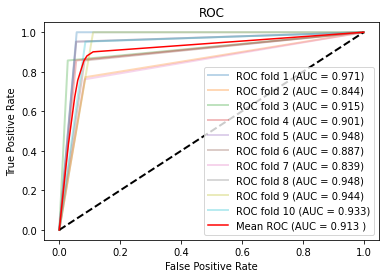

In [ ]:
tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100) # 기본적으로 배열을 0에서 1사이의 값을 100등분한 것으로 채워라!
i = 1
for train,test in cv.split(df,targets):
    prob=clf.fit(df.iloc[train], targets.iloc[train]).predict_proba(df.iloc[test])[:,1] #실제 positive에 대한 prob를 구해서 prob으로 넣어줘야함...ㅠㅠ
    y_pred=clf.predict(df.iloc[test]) # k-fold를 진행할 때 마다의 y_test에 대한 prediction
    c_mat=confusion_matrix(targets[test],y_pred)
    print(accuracy_score(targets[test],y_pred))
    print(c_mat)
    print(classification_report(targets[test],y_pred))
    for k in range(len(targets[test])):
      if targets[test].iloc[k]!=y_pred[k]:
    #여기서 ==라고 하면 예측과 실제가 맞는 것의 확률, 특성이 나오고 =!로 하면 예측과 실제가 맞지 않는 것의 확률, 특성이 나옴
        if y_pred[k] == 1 and prob[k]>0.9: #확률에 따라 출력하고 싶은 값들을 조절할 수 있다.
         print(prob[k])
         print("실제 lable : ")
         print(targets[test].iloc[k])
         print("예측 : ")
         print(y_pred[k])         
         print(df.iloc[test].iloc[k,:])
        elif y_pred[k]==0 and 1-prob[k]>0.9:
         print(1-prob[k])
         print("실제 lable : ")
         print(targets[test].iloc[k])
         print("예측 : ")
         print(y_pred[k]) 
         print(df.iloc[test].iloc[k,:])
    feature_imp = clf.fit(x_train,y_train).feature_importances_
    print('{}'.format(feature_imp))
    data = pd.DataFrame(data=feature_imp,index=df.iloc[train].columns, columns=["score"]).sort_values(by = "score", ascending=False)
    print(data[:8])
    fpr, tpr, t = roc_curve(targets[test],prob)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr,lw=2, alpha=0.3, label=r'ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
    plt.legend(loc="lower right")
    i= i+1


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.3f )' % (mean_auc),alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()
